In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
bad_circulation = pd.read_csv("bad_circulation.csv")

In [4]:
soso_circulation = pd.read_csv("soso_circulation.csv")

In [5]:
bad_circulation.columns

Index(['Unnamed: 0', 'date', 'sales', 'meal', 'snack', 'drink', 'home_living',
       'health_beauty', 'hobby', 'social', 'infant'],
      dtype='object')

In [6]:
del bad_circulation['Unnamed: 0']

In [7]:
del soso_circulation['Unnamed: 0']

In [8]:
bad_date = bad_circulation.date
bad_drink = bad_circulation.drink
soso_date = soso_circulation.date
soso_drink = soso_circulation.drink

In [9]:
bad_date = pd.DataFrame(bad_date)
bad_drink = pd.DataFrame(bad_drink)
soso_date = pd.DataFrame(soso_date)
soso_drink = pd.DataFrame(soso_drink)

bad = pd.concat([bad_date, bad_drink], axis = 1)
soso = pd.concat([soso_date, soso_drink], axis = 1)

In [10]:
bad = bad.rename(columns={'drink': 'bad_drink'})
soso = soso.rename(columns={'drink': 'soso_drink'})
bad = bad.reset_index(drop=True)
soso = soso.reset_index(drop=True)

In [11]:
bad_date = bad.date.tolist()
bad_drink = bad.bad_drink.tolist()
soso_date = soso.date.tolist()
soso_drink = soso.soso_drink.tolist()

In [13]:
bad_column = bad_circulation.columns
result = []
for i in bad_drink:
    
    text = str(i)
    text= text.replace("%","")
    result.append(text)

In [14]:
bad_drink = pd.DataFrame(result)
bad_date = pd.DataFrame(bad_date)

bad = pd.concat([bad_date, bad_drink], axis = 1)
bad.columns = ["date", "bad_drink"]

In [15]:
result = []
for i in soso_drink:
    
    text = str(i)
    text= text.replace("%","")
    result.append(text)
    
soso_drink = pd.DataFrame(result)
soso_date = pd.DataFrame(soso_date)

soso = pd.concat([soso_date, soso_drink], axis = 1)
soso.columns = ["date", "soso_drink"] 

In [16]:
bad_ha = {}
result = []
date = bad.date
drink = bad.bad_drink
for i in range(0, len(date)):
    result = []
    for j in range(i, len(date)):
        if i == j:
            if date[i] == date[j]:
                if(date[i] in bad_ha):
                    if type(bad_ha[date[i]]) != list:
                        result.append(bad_ha[date[i]])
                    else:
                        result = bad_ha[date[i]]
                    result.append(drink[i])
                    bad_ha[date[i]] = result
                    pass
                else:
                    bad_ha[date[i]] = drink[i]
            else:
                i = j
                break
        else:
            i = j
            break

In [17]:
bad_date_key = list(bad_ha.keys())
bad_drink_aver = {}
drink_result_bad = []
drink_date_bad = []

for i in bad_date_key:
    aver = 0
    for j in bad_ha[i]:
        aver = aver + float(j)
    aver = aver / len(bad_ha[i])
    drink_result_bad.append(aver)
    drink_date_bad.append(i)
    bad_drink_aver[i] = aver

In [18]:
soso_ha = {}
result = []
date = soso.date
drink = soso.soso_drink
for i in range(0, len(date)):
    result = []
    for j in range(i, len(date)):
        if i == j:
            if date[i] == date[j]:
                if(date[i] in soso_ha):
                    if type(soso_ha[date[i]]) != list:
                        result.append(soso_ha[date[i]])
                    else:
                        result = soso_ha[date[i]]
                    result.append(drink[i])
                    soso_ha[date[i]] = result
                    pass
                else:
                    soso_ha[date[i]] = drink[i]
            else:
                i = j
                break
        else:
            i = j
            break

soso_date_key = list(soso_ha.keys())
soso_drink_aver = {} 
drink_result_soso = []
drink_date_soso = []

for i in soso_date_key:
    aver = 0
    for j in soso_ha[i]:
        aver = aver + float(j)
    aver = aver / len(soso_ha[i])
    drink_result_soso.append(aver)
    drink_date_soso.append(i)
    soso_drink_aver[i] = aver

In [21]:
drink_date_soso_temp = drink_date_soso
drink_date_soso_temp = pd.DataFrame(drink_date_soso_temp)
drink_result_soso_temp = drink_result_soso
drink_result_soso_temp = pd.DataFrame(drink_result_soso_temp)
soso_drink = pd.concat([drink_date_soso_temp, drink_result_soso_temp], axis=1)
soso_drink.columns = ['date', 'aver_soso']

drink_date_bad_temp = drink_date_bad
drink_date_bad_temp = pd.DataFrame(drink_date_bad_temp)
drink_result_bad_temp = drink_result_bad
drink_result_bad_temp = pd.DataFrame(drink_result_bad_temp)
bad_drink = pd.concat([drink_date_bad_temp, drink_result_bad_temp], axis=1)
bad_drink.columns = ['date', 'aver_bad']

In [22]:
drink = pd.merge(soso_drink, bad_drink, how='outer')
drink = drink.sort_values(by = "date")
drink = drink.reset_index()

In [23]:
drink.columns

Index(['index', 'date', 'aver_soso', 'aver_bad'], dtype='object')

In [25]:
del drink['index']

In [27]:
drink['DateTime'] = drink['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [29]:
del drink['date']
drink = drink.set_index("DateTime")

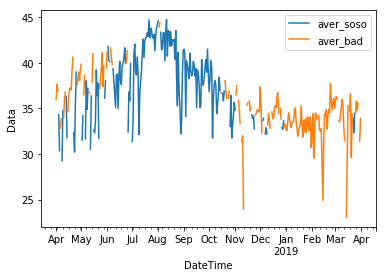

In [30]:
drink.plot()
plt.ylabel("Data")
plt.rcParams["figure.figsize"] = [25,9]
plt.show()